Image 1: Received as base64


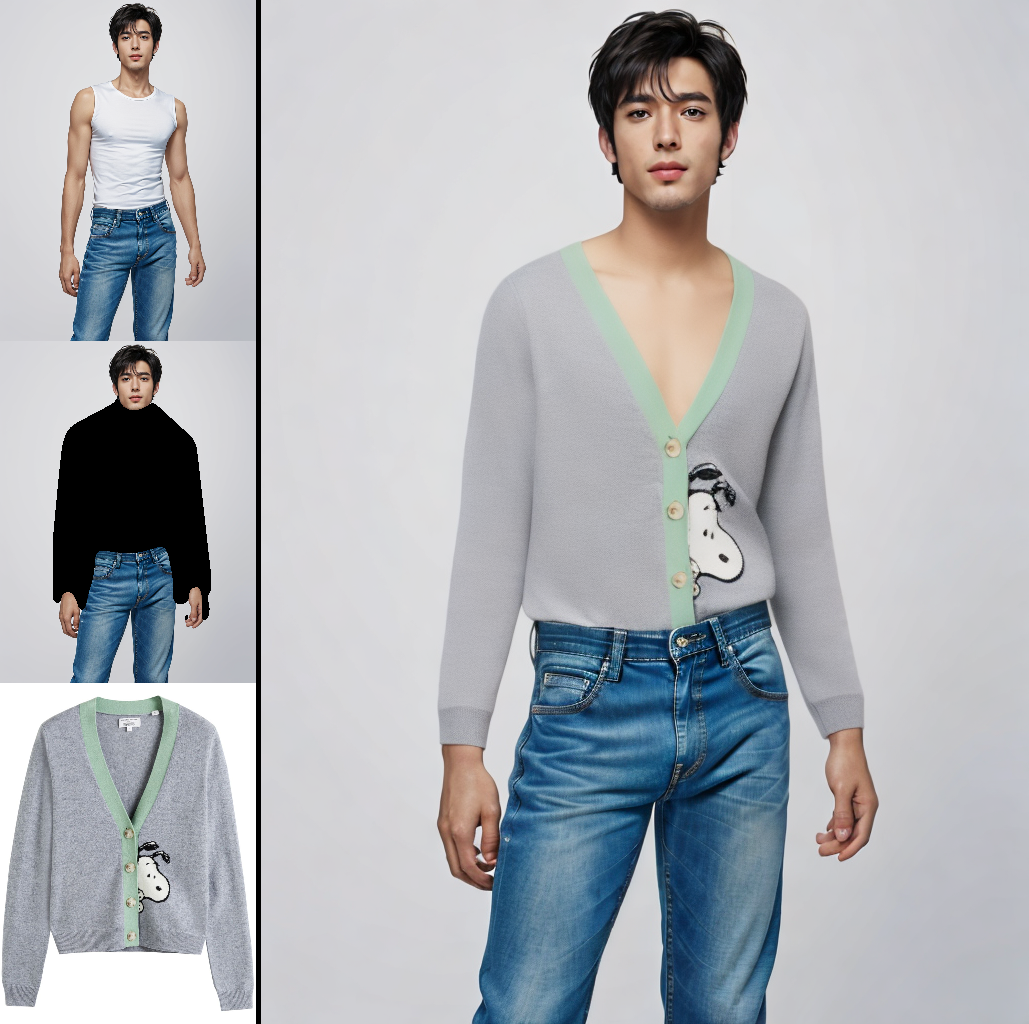

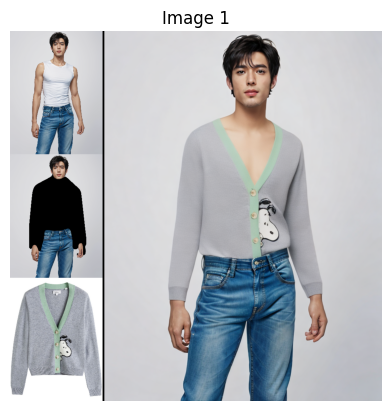

In [7]:
import requests
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt


API_URL = "http://127.0.0.1:8000/infer"

person_files=["/home/bibekyess/yolo/plain_rag/Clothes-Virtual-Try-On/catvton/resource/demo/example/person/men/model_5.png"]
cloth_files=["/home/bibekyess/yolo/plain_rag/Clothes-Virtual-Try-On/catvton/resource/demo/example/condition/upper/21514384_52353349_1000.jpg"]

payload = {
    "person_files": person_files,
    "cloth_files": cloth_files,
    "cloth_type": "upper",
    "num_inference_steps": 10,
    "guidance_scale": 2.5,
    "seed": 42,
    "show_type": "input & mask & result",
    "batch_size": 4,
    # "target_width": 616,
    # "target_height": 820
}

response = requests.post(API_URL, json=payload)
images = []


if response.status_code == 200:
    data = response.json()
    if "images" in data:
        images = data["images"]

        for idx, img_base64 in enumerate(images):
            print(f"Image {idx + 1}: Received as base64")
            # Decode the base64 string back to an image
            img_data = base64.b64decode(img_base64)
            # print(img_data)
            img = Image.open(io.BytesIO(img_data))
            img.show()
            # Display the image using Matplotlib
            plt.figure()
            plt.imshow(img)
            plt.axis("off")
            plt.title(f"Image {idx + 1}")
            plt.show()
else:
    print(f"Request failed with status code: {response.status_code}")
    print(f"Error details: {response.text}")
